# Project 3: Communicate Data Findings

## By Peter Akinnawonu

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Preliminary Wrangling</a></li>
<li><a href="#explore">Data Exploration</a></li>
<li><a href="#univar">Univariate Analysis</a></li>
<li><a href="#bivar">Bivariate Analysis</a></li>
<li><a href="#multivar">Multivariate Analysis</a></li>
<li><a href="#conclude">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Dataset I will be wrangling, analyzing and communicate my findings is the Prosper Loan Dataset. This data set is a record of loans given out by Prosper Loan, a loan company in the US. The loan data contains records of 113,937 loans in total. 
This is an Exploratory and Explanatory Data Analaysis where I will be using visualizations to communicate my findings.

The purpose of this analysis is to investigate the performance of loans by looking at the dataset in terms of completed repayments, profits and return on investments and looking at various trends and factors which may be responsible for performance of loans.

<a id='wrangle'></a>
## Preliminary Wrangling

In [138]:
# To import python libaries for analysis
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
df = pd.read_csv("prosperLoanData.csv")

In [50]:
df.shape

(113937, 81)

### Structure of Dataset
The Prosper Loan Dataset has 113937 entries featured in 81 columns

### The main features of interest in the dataset
The features of interest include Prosper score, loanstatus, isborrowerhomeowner, creditgrade, prosperrating (alpha), borrowerapr, borrowerrate, estimated return and estimatedloss.

### Features in the dataset that helps support investigation into your features of interest
Prosper score, Loan status and isborrowerhomeowner

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [52]:
df.duplicated().sum()

0

#### The ProsperLoanData has 113937 entries and 81 columns, which are variables on each loan

<a id='clean'></a>
### Data Cleaning

I'd clean the data before exploratory analysis 

First, I'd make a copy of the dataset before cleaning

In [53]:
dfb = df.copy()

In [54]:
# To change all the column names to lower case

dfb.rename(columns = str.lower, inplace = True)

In [55]:
# To fill the null borrower apr values with the mean 

dfb['borrowerapr'] = dfb['borrowerapr'].fillna(dfb['borrowerapr'].mean())

In [56]:
#  To fill null values in borrowerstate with 'unnamed'

dfb['borrowerstate'].fillna('unnamed', inplace = True)

In [57]:
# To fill null occupation with 'nojob'

dfb['occupation'].fillna('nojob', inplace = True)

In [58]:
# To display full rows and columns

pd.set_option('display.max_rows', None, 'display.max_columns', None)

dfb.sample(3)

listingkey  listingnumber            listingcreationdate  \
76507  66233404019797675D4521B         223816  2007-10-31 10:09:44.527000000   
51631  40033602761902150563400        1146994  2014-02-08 07:03:31.873000000   
17381  D3583364434307990DD2776           4662  2006-04-02 10:58:14.193000000   

      creditgrade  term loanstatus           closeddate  borrowerapr  \
76507           A    36  Completed  2008-04-10 00:00:00      0.09688   
51631         NaN    36    Current                  NaN      0.13836   
17381           C    36  Completed  2009-04-13 00:00:00      0.15713   

       borrowerrate  lenderyield  estimatedeffectiveyield  estimatedloss  \
76507        0.0900       0.0800                      NaN            NaN   
51631        0.1099       0.0999                  0.09628         0.0324   
17381        0.1500       0.1450                      NaN            NaN   

       estimatedreturn  prosperrating (numeric) prosperrating (alpha)  \
76507              NaN                      NaN                   NaN   
51631          0.06388                      6.0                     A   
17381              NaN                      NaN                   NaN   

       prosperscore  listingcategory (numeric) borrowerstate  occupation  \
76507           NaN                          0            UT       Other   
51631           6.0                          7            PA  Nurse (RN)   
17381           NaN                          0       unnamed       nojob   

      employmentstatus  employmentstatusduration  isborrowerhomeowner  \
76507    Self-employed                      12.0                False   
51631         Employed                     251.0                False   
17381              NaN                       NaN                False   

       currentlyingroup groupkey               datecreditpulled  \
76507             False      NaN  2007-10-31 09:54:05.063000000   
51631             False      NaN            2014-02-08 07:03:31   
17381             False      NaN  2006-04-02 10:58:14.193000000   

       creditscorerangelower  creditscorerangeupper firstrecordedcreditline  \
76507                  740.0                  759.0     2004-08-03 00:00:00   
51631                  680.0                  699.0     1999-01-20 00:00:00   
17381                    NaN                    NaN                     NaN   

       currentcreditlines  opencreditlines  totalcreditlinespast7years  \
76507                 5.0              5.0                         8.0   
51631                15.0             15.0                        31.0   
17381                 NaN              NaN                         NaN   

       openrevolvingaccounts  openrevolvingmonthlypayment  \
76507                      5                         93.0   
51631                     10                        340.0   
17381                      0                          0.0   

       inquirieslast6months  totalinquiries  currentdelinquencies  \
76507                   1.0            10.0                   0.0   
51631                   0.0             8.0                   0.0   
17381                   NaN             NaN                   NaN   

       amountdelinquent  delinquencieslast7years  publicrecordslast10years  \
76507               0.0                      0.0                       0.0   
51631               0.0                      0.0                       1.0   
17381               NaN                      NaN                       NaN   

       publicrecordslast12months  revolvingcreditbalance  bankcardutilization  \
76507                        0.0                    18.0                 0.00   
51631                        0.0                  9020.0                 0.74   
17381                        NaN                     NaN                  NaN   

       availablebankcardcredit  totaltrades  \
76507                  20082.0          8.0   
51631                   2136.0         25.0   
17381                      NaN

In [59]:
# To check the listingkey for duplicates and remove all duplicates

dfb[dfb['listingkey'].duplicated()]

listingkey  listingnumber            listingcreationdate  \
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
999     0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   
2539    2D2635984503681189056B4        1097584  2014-01-11 07:50:08.037000000   
4942    4B7E3590031274113F1FD34         927246  2013-09-26 09:35:36.317000000   
5812    94B035909835592957503E6         920397  2013-09-24 13:27:48.287000000   
5971    2EC635885737984509D5366         894748  2013-09-16 06:59:12.297000000   
6385    083235967773321272C26B9        1066466  2013-12-10 13:39:07.220000000   
7415    5A2F35875117483773421B0         875616  2013-08-21 07:25:22.360000000   
7538    09AD35918712001025AC1BD         969821  2013-10-24 13:21:31.607000000   
7555    021F3593082999771F5E621         970570            2013-11-01 13:53:22   
8683    8E8B35952875791221BB463        1047993  2013-11-25 08:46:13.073000000   
8925    359F36006583392169BF3F3        1138422  2014-01-14 16:09:07.770000000   
9102    9A4A36004039348126F769C        1100572  2014-01-12 08:01:41.417000000   
9281    47C1359638497431975670B        1057901  2013-12-06 11:44:58.283000000   
10036   0C6036000415689128E6FE2        1101199  2014-01-12 10:10:41.447000000   
10401   68153589168873924D3A78D         898052  2013-09-12 12:53:22.680000000   
10467   0CF635895559781161C1DF0         890514  2013-09-07 06:25:14.057000000   
11635   9F3F3598049868065A10243        1069928  2013-12-13 08:05:03.380000000   
11889   04A53597159795718CE3A26        1063352  2013-12-09 18:54:29.140000000   
11979   693435900525895578B8728         900913  2013-09-16 18:45:59.473000000   
12379   9F493599966105917027FC0        1116810  2014-01-06 09:16:14.857000000   
12595   16D935877639843867B8CD7         877625  2013-08-22 20:45:22.927000000   
12694   5DB83600871174699C124B4        1114591  2014-01-16 11:16:58.077000000   
12780   5DB83600871174699C124B4        1114591  2014-01-16 11:16:58.077000000   
12956   059135904162159071EA963         925803  2013-09-26 06:08:44.510000000   
13210   0ED935963528799464A73B9        1027003  2013-12-05 06:07:39.743000000   
13322   487E36006726969571BB95E        1111486  2014-01-14 17:19:38.497000000   
13445   064B35991936714505AE3E7        1138731  2014-01-14 18:13:03.870000000   
14062   5FCE3599129004004590982        1077775  2014-01-03 07:58:17.743000000   
14071   0FE63589666879701965D2E         898757  2013-09-12 14:20:39.077000000   
14114   484535954799474542E4235         990994  2013-11-12 19:31:17.900000000   
14469   17E035962771170915118B7        1044353  2013-12-03 07:26:15.663000000   
14888   17A93590655669644DB4C06         951186  2013-10-02 17:20:16.550000000   
15171   081C359727187929726315B        1090596  2013-12-17 04:52:24.187000000   
15855   4A2B3589916361549758617         926217  2013-09-26 07:19:23.177000000   
17412   9941360010631472131F80C        1116297  2014-01-06 07:23:21.390000000   
17460   866C3592918867748EDDD1F         953329  2013-10-21 16:37:18.397000000   
17664   4A013594182830426C94ED8        1025631  2013-11-06 14:48:39.520000000   
17913   9A0035864971747773796EC         877117  2013-08-21 22:10:16.220000000   
18070   8B9235925836773935FBA8B         985290  2013-10-15 22:22:57.873000000   
18298   87BC3590189138920C819C0         919724  2013-09-23 11:57:14.977000000   
18851   124035920869119558C76F7         958819  2013-10-25 09:25:08.063000000   
19256   02AD3598720043943A56991        1097279  2013-12-26 13:26:46.030000000   
19452   5B593592400624711436586         945736  2013-10-10 09:47:43.773000000   
19822   AAB23598113665731DAA015        1059427  2013-12-19 13:18:53.313000000   
20113   16DF35942362737180DFA30        1015904  2013-11-14 08:37:34.687000000   
20289   5A2F35875117483773421B0         875616  2013-08-21 07:25:22.360000000   
20569   17A93590655669644DB4C06         951186  2013-10-02 17:20:16.550000000   
20813   A15C3603417680595D3195B        1202163  2014

In [60]:
dfb[dfb['listingkey'].duplicated()].shape[0]

871

In [61]:
dfb.drop_duplicates(subset = 'listingkey', keep= 'last', inplace = True)

In [62]:
dfb.reset_index(inplace = True)

### Now, let's dive into the Exploratory analysis by finding patterns and trends

<a id='explore'></a>
## Data Exploration

In [63]:
dfb.describe()

index  listingnumber           term    borrowerapr  \
count  113066.000000   1.130660e+05  113066.000000  113066.000000   
mean    57079.608494   6.248036e+05      40.800170       0.218980   
std     32898.498399   3.273262e+05      10.421518       0.080474   
min         0.000000   4.000000e+00      12.000000       0.006530   
25%     28596.250000   3.976670e+05      36.000000       0.156290   
50%     57130.500000   5.978385e+05      36.000000       0.209860   
75%     85584.750000   8.849650e+05      36.000000       0.283860   
max    113936.000000   1.255725e+06      60.000000       0.512290   

        borrowerrate    lenderyield  estimatedeffectiveyield  estimatedloss  \
count  113066.000000  113066.000000             83982.000000   83982.000000   
mean        0.192946       0.182882                 0.168870       0.080417   
std         0.074917       0.074612                 0.068607       0.046851   
min         0.000000      -0.010000                -0.182700       0.004900   
25%         0.134000       0.124500                 0.116000       0.042400   
50%         0.184000       0.174000                 0.161620       0.072400   
75%         0.250600       0.240600                 0.225300       0.112000   
max         0.497500       0.492500                 0.319900       0.366000   

       estimatedreturn  prosperrating (numeric)  prosperscore  \
count     83982.000000             83982.000000  83982.000000   
mean          0.096246                 4.068705      5.954502   
std           0.030475                 1.675442      2.373520   
min          -0.182700                 1.000000      1.000000   
25%           0.074630                 3.000000      4.000000   
50%           0.092110                 4.000000      6.000000   
75%           0.117100                 5.000000      8.000000   
max           0.283700                 7.000000     11.000000   

       listingcategory (numeric)  employmentstatusduration  \
count              113066.000000             105441.000000   
mean                    2.776838                 96.060584   
std                     3.998188                 94.432241   
min                     0.000000                  0.000000   
25%                     1.000000                 26.000000   
50%                     1.000000                 67.000000   
75%                     3.000000                137.000000   
max                    20.000000                755.000000   

       creditscorerangelower  creditscorerangeupper  currentcreditlines  \
count          112475.000000          112475.000000       105462.000000   
mean              685.524961             704.524961           10.307058   
std                66.635895              66.635895            5.458196   
min                 0.000000              19.000000            0.000000   
25%               660.000000             679.000000            7.000000   
50%               680.000000             699.000000           10.000000   
75%               720.000000             739.000000           13.000000   
max               880.000000             899.000000           59.000000   

       opencreditlines  totalcreditlinespast7years  openrevolvingaccounts  \
count    105462.000000               112369.000000          113066.000000   
mean          9.248336                   26.746380               6.959466   
std           5.021249                   13.643731               4.629303   
min           0.000000                    2.000000               0.000000   
25%           6.000000                   17.000000               4.000000   
50%           8.000000                   25.000000               6.000000   
75%          12.000000                   35.000000               9.000000   
max          54.000000                  136.000000              51.000000   

       openrevolvingmonthlypayment  inquirieslast6months  totalinquiries  \
count                113066.000000         112369.000000   111907.000000   
mean          

In [64]:
dfb.columns

Index(['index', 'listingkey', 'listingnumber', 'listingcreationdate',
       'creditgrade', 'term', 'loanstatus', 'closeddate', 'borrowerapr',
       'borrowerrate', 'lenderyield', 'estimatedeffectiveyield',
       'estimatedloss', 'estimatedreturn', 'prosperrating (numeric)',
       'prosperrating (alpha)', 'prosperscore', 'listingcategory (numeric)',
       'borrowerstate', 'occupation', 'employmentstatus',
       'employmentstatusduration', 'isborrowerhomeowner', 'currentlyingroup',
       'groupkey', 'datecreditpulled', 'creditscorerangelower',
       'creditscorerangeupper', 'firstrecordedcreditline',
       'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years',
       'openrevolvingaccounts', 'openrevolvingmonthlypayment',
       'inquirieslast6months', 'totalinquiries', 'currentdelinquencies',
       'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization'

In [65]:
dfb['isborrowerhomeowner'].isnull().sum()

0

In [66]:
dfb["incomerange"].value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: incomerange, dtype: int64

In [67]:
loan_inc_rang = list(dfb["incomerange"].unique())
loan_inc_rang

['$25,000-49,999',
 '$50,000-74,999',
 'Not displayed',
 '$100,000+',
 '$75,000-99,999',
 '$1-24,999',
 'Not employed',
 '$0']

In [68]:
dfb["incomerange"].value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: incomerange, dtype: int64

In [69]:
loan_employ = list(dfb["employmentstatus"].unique())
loan_employ

['Self-employed',
 'Employed',
 'Not available',
 'Full-time',
 'Other',
 nan,
 'Not employed',
 'Part-time',
 'Retired']

In [70]:
dfb["employmentstatus"].value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: employmentstatus, dtype: int64

<a id='univar'></a>
## Univariate Analysis

The first  types of analysis that I'd be visualizing is the Univarate analysis for numerical values by histogram, countplot and boxplot; categorical values by countplot and pie chart

#### Now, I'd visualize some individual colums

In [71]:
dfb["prosperscore"].min(),dfb["prosperscore"].max()

(1.0, 11.0)

In [72]:
bins = np.arange(1,11,.5)

### Question: What is the Distribution per Count of Prosper Score?

### Visualization

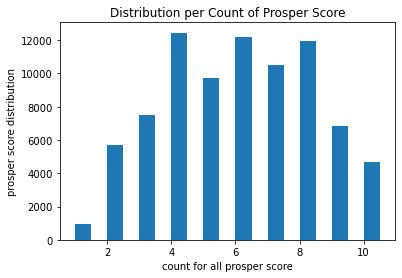

In [73]:
plt.hist(data = dfb , x = "prosperscore" , bins = bins)
plt.title("Distribution per Count of Prosper Score")
plt.xlabel("count for all prosper score")
plt.ylabel("prosper score distribution");

#### Observation: This shows that majority of the borrowers have a Prosper Score of 4

In [74]:
dfb.prosperscore.mean()

5.9545021552237385

The mean prosperscore is approximately 6, as depicted in the box plot below

### Question: What is the average Prosper Score?

#### Visualization

Text(0.5, 1.0, 'Prosper Score Plot')

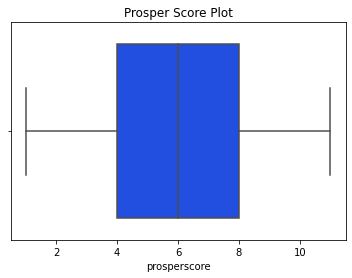

In [75]:
coloring = sb.color_palette("bright")[0]
sb.boxplot(data = dfb , x = "prosperscore", color=coloring);
plt.title("Prosper Score Plot")

#### Observation: There are more borrowers with prosper score of 4 but the average prosper score is 6.0 

In [76]:
dfb["prosperscore"].value_counts()

4.0     12444
6.0     12177
8.0     11970
7.0     10496
5.0      9735
3.0      7528
9.0      6857
2.0      5688
10.0     4694
11.0     1432
1.0       961
Name: prosperscore, dtype: int64

In [77]:
dfb["ontimeprosperpayments"].value_counts()

9.0      1565
6.0      1230
10.0     1134
11.0     1029
35.0      828
12.0      824
7.0       799
13.0      745
8.0       710
14.0      650
15.0      550
16.0      515
17.0      490
18.0      459
1.0       438
19.0      436
20.0      400
21.0      372
5.0       352
34.0      347
23.0      331
22.0      327
2.0       308
3.0       304
4.0       296
33.0      295
24.0      291
32.0      268
27.0      268
25.0      264
28.0      254
31.0      246
26.0      239
29.0      238
30.0      230
36.0      175
44.0      138
48.0      133
43.0      122
46.0      121
50.0      120
38.0      118
49.0      117
45.0      114
51.0      114
40.0      113
52.0      111
47.0      108
41.0      104
39.0      101
56.0       99
37.0       99
55.0       98
54.0       94
42.0       90
53.0       85
70.0       83
59.0       82
58.0       80
57.0       76
0.0        75
61.0       73
63.0       65
65.0       58
62.0       57
60.0       50
64.0       50
68.0       49
66.0       41
67.0       38
76.0       38
69.0  

### Question: What is the most common Prosper Score?

### Visualization

Text(0.5, 1.0, 'Prosper Score Count')

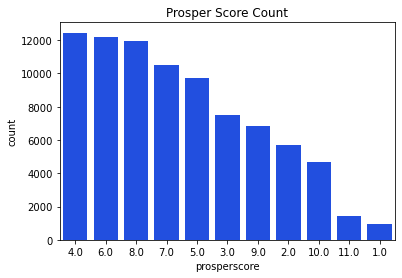

In [78]:
labels = dfb["prosperscore"].value_counts().index
sb.countplot(data = dfb , x = "prosperscore", color=coloring, order=labels)
plt.title("Prosper Score Count")

#### Observation: 4.0 is the most common prosperscore while 1.0 is the least common prosperscore. Now, let's look at if the borrowers own a home, and how it affects the loan performance

### Question: Does the borrower own a home and how does it affect loan performance?

### Visualization

Text(0.5, 1.0, 'Does the Borrower Owns a Home')

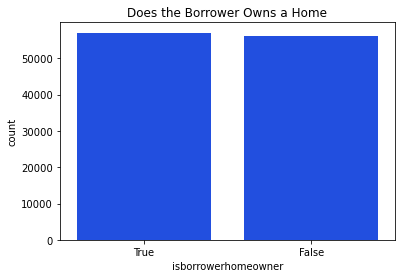

In [79]:
labels = dfb["isborrowerhomeowner"].value_counts().index
coloring = sb.color_palette("bright")[0]
sb.countplot(data = dfb , x = "isborrowerhomeowner", color=coloring, order=labels)
plt.title("Does the Borrower Owns a Home")

#### Observation: The above shows that the number of Borrowers that own a home is above 5000, and are almost the same as the number of borrowers that do not own a home. This shows that home ownership does not afftect loan performance

####  Now, I'd let's visualize some categorical columns

### Question: What is the Employment status of Borrowers?

### Visualization

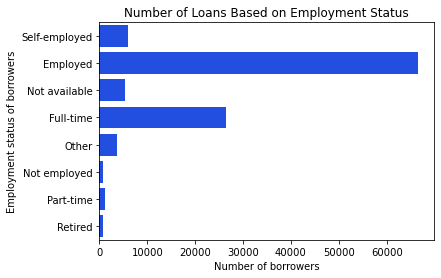

In [80]:
sb.countplot(data = dfb, y = "employmentstatus", color= coloring);
plt.title("Number of Loans Based on Employment Status")
plt.ylabel("Employment status of borrowers")
plt.xlabel("Number of borrowers");

#### Observation: This shows that majority of borrowers are employed. Employment status could be a consideration by the loan company in loans disbursement.

In [81]:
# check to see the counts of various credit ratings
loan_rating = dfb['prosperrating (alpha)'].value_counts().sort_index()
loan_rating

A     14390
AA     5325
B     15368
C     18096
D     14170
E      9716
HR     6917
Name: prosperrating (alpha), dtype: int64

In [82]:
loanstat = df["LoanStatus"].value_counts()[:4]
Loan_num = loanstat.index

### Question: What is the spread of loans based on loan status?

### Visualization

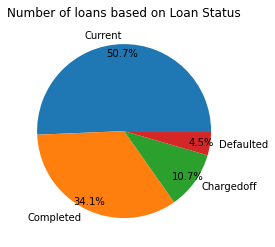

In [83]:
# the top 4 loan Status
Loanstat = df["LoanStatus"].value_counts()[:4]
Loan_num = Loanstat.index
plt.title("Number of loans based on Loan Status");    
plt.pie(Loanstat, labels = Loan_num , autopct= "%.1f%%", pctdistance=.9);

#### Observation:  About 50% of the total loans are current, (ongoing) 34% are completed, 10.7% are Chargedoff while 4.5% are defaulted.

### Collation of Univarate plots

In [84]:
def Univarate_plots():
    plt.figure(figsize= [30,8])
    
    plt.subplot(1,4,1)
    loanstat = df["LoanStatus"].value_counts()[:4] # the most 4 loanStatus
    Loan_num = loanstat.index
    Loanstat = df["LoanStatus"].value_counts()[:4] # the most 4 loanStatus
    plt.title("Number of loans based on Loan Status")
    plt.pie(Loanstat, labels = Loan_num , autopct= "%.1f%%", pctdistance=.9);
    
    plt.subplot(1,4,2)  
    sb.countplot(data = dfb, y = "employmentstatus", color= coloring);
    plt.title("Number of Loans Based on Employment Status")
    plt.ylabel("Employment status of borrowers")
    plt.xlabel("Number of borrowers");
    
    plt.subplot(1,4,3)
    labels = dfb["prosperscore"].value_counts().index
    sb.countplot(data = dfb , x = "prosperscore", color=coloring, order=labels)
    plt.title("Prosper Score Count")
    

    plt.subplot(1,4,4)
    plt.hist(data = dfb , x = "prosperscore" , bins = bins)
    plt.title("Distribution per Count of Prosper Score")
    plt.xlabel("count for all prosper score")
    plt.ylabel("prosper score distribution"); 

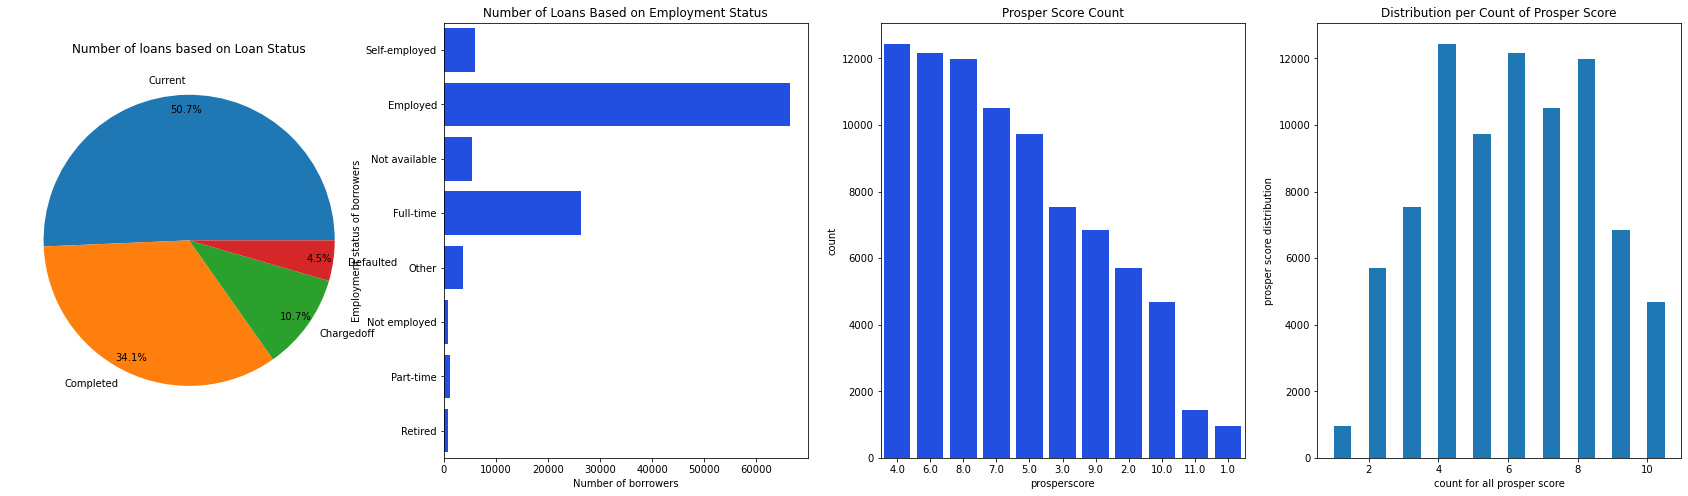

In [85]:
# Univarate plots collated
Univarate_plots()

In [86]:
def plot_category(var):
    """to plot a categorical variable in chart"""
    label = dfb[var].value_counts().index
    sb.countplot(data = dfb, y = var, color= coloring, label = label);
    plt.xlabel("number of borrowers")
    plt.ylabel(f" {var} of borrowers")
    plt.title(f"Number of Loans per {var}")

### Question: what is the number of borrowers per loan status?

### Visualization

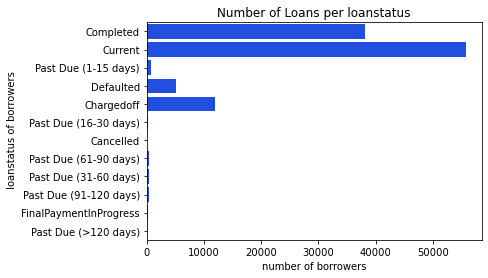

In [87]:
plot_category("loanstatus")

#### Observation: Current loans are the highest number of loans

### Question: Which state has the highest amount of loans disbursed?

### Visualization

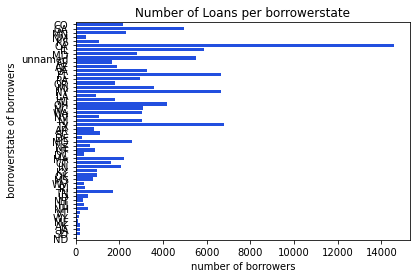

In [88]:
plot_category("borrowerstate")

#### Observation: This shows that California state has the highest number of loans disbursed.

### Question: what is the most common prosper rating?

### Visualization

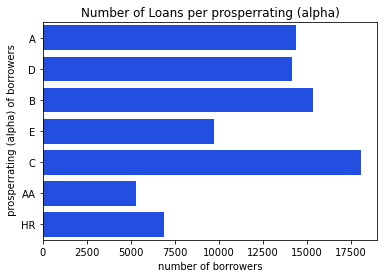

In [89]:
plot_category("prosperrating (alpha)")

#### Observation: Most borrowers (17,500) have a prosperrating of C

### Question: what creditgrade is common?

### Visualization

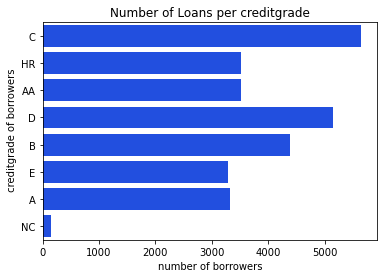

In [90]:
plot_category("creditgrade")

#### Observation: Most borrowers (above 5000) have a creditgrade of C

### Question: the spread of loans based on incomerange?

### Visualization

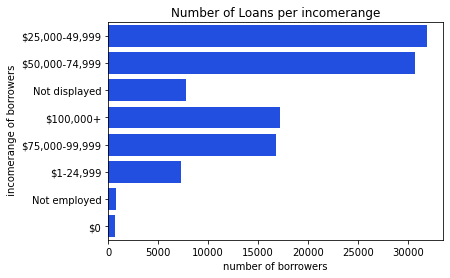

In [91]:
plot_category("incomerange")

#### Observation: Most borrowers have an income range of $25,000 - $49,999 closely followed by borrowers in $50,000 - $74,999 income range

<a id='bivar'></a>
## Bivarate Analysis: 

numerical vs categorical - boxplot, violinplot, facetgrid

numerical - scatterplot

categorical  - countplot, hue = "color of the bar"

### Question: what is the correlation between borrowerrate and borrower Annual Percentage Rate?

### Visualization

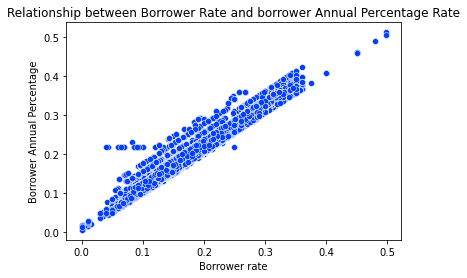

In [92]:
sb.scatterplot(data = dfb, x = "borrowerrate", y = "borrowerapr", color= coloring);
plt.title("Relationship between Borrower Rate and borrower Annual Percentage Rate")
plt.ylabel("Borrower Annual Percentage")
plt.xlabel("Borrower rate");
reg_title = 'regression relationship',

### Observation: This shows a positive correlation between the borrowerrate and borrowerapr

#### Change the Boolean Values to 0 or 1, so I can categorize them

In [96]:
masks = dfb["isborrowerhomeowner"] == True
masks_ = dfb["isborrowerhomeowner"] == False
dfb.loc[masks, "isborrowerhomeowner"] = 1
dfb.loc[masks_, "isborrowerhomeowner"] = 0
borrower_uni = list(dfb["isborrowerhomeowner"].unique())
cat_type = pd.api.types.CategoricalDtype(ordered= False , categories = borrower_uni)
dfb["isborrowerhomeowner"] = dfb["isborrowerhomeowner"].astype(cat_type)

In [97]:
dfb.rename(columns= {"prosperrating (numeric)":"prosperrating_numeric"},inplace = True)

In [98]:
dfb.corr()

index  listingnumber      term  \
index                                1.000000       0.001709 -0.002910   
listingnumber                        0.001709       1.000000  0.320191   
term                                -0.002910       0.320191  1.000000   
borrowerapr                          0.004562      -0.029302 -0.010810   
borrowerrate                         0.003929      -0.112241  0.020376   
lenderyield                          0.003938      -0.111384  0.020849   
estimatedeffectiveyield              0.001362      -0.216325  0.057197   
estimatedloss                        0.002275      -0.239349 -0.108414   
estimatedreturn                      0.001894      -0.459091  0.154055   
prosperrating_numeric               -0.003251       0.209065  0.080679   
prosperscore                        -0.005520      -0.105564  0.028830   
listingcategory (numeric)            0.000522       0.128971  0.005479   
employmentstatusduration            -0.002415       0.157983  0.083015   
currentlyingroup                    -0.001970      -0.439502 -0.143752   
creditscorerangelower               -0.003903       0.270609  0.126542   
creditscorerangeupper               -0.003903       0.270609  0.126542   
currentcreditlines                   0.001920       0.144986  0.076848   
opencreditlines                      0.001994       0.195074  0.096076   
totalcreditlinespast7years           0.004349       0.130910  0.076682   
openrevolvingaccounts                0.002681       0.231898  0.093706   
openrevolvingmonthlypayment         -0.000859       0.184495  0.084200   
inquirieslast6months                 0.003337      -0.299328 -0.113608   
totalinquiries                       0.004571      -0.281114 -0.103500   
currentdelinquencies                 0.001814      -0.233141 -0.083719   
amountdelinquent                    -0.000937      -0.024522 -0.016769   
delinquencieslast7years             -0.000909      -0.078699 -0.041458   
publicrecordslast10years            -0.000607      -0.045629 -0.029339   
publicrecordslast12months           -0.000133      -0.072768 -0.026096   
revolvingcreditbalance              -0.000321       0.057397  0.026310   
bankcardutilization                  0.005738       0.086107  0.031624   
availablebankcardcredit             -0.001300       0.036837  0.015552   
totaltrades                          0.003505       0.135312  0.079884   
tradesneverdelinquent (percentage)   0.000781       0.254111  0.119068   
tradesopenedlast6months              0.004870      -0.085786 -0.029865   
debttoincomeratio                    0.000356      -0.041875 -0.014776   
incomeverifiable                    -0.003619      -0.023370  0.040477   
statedmonthlyincome                  0.001051       0.076209  0.028531   
totalprosperloans                    0.002054       0.176144  0.070298   
totalprosperpaymentsbilled           0.003506       0.133513  0.002061   
ontimeprosperpayments                0.001216       0.133854  0.002674   
prosperpaymentslessthanonemonthlate  0.015716       0.021698 -0.002390   
prosperpaymentsonemonthpluslate      0.010950      -0.005401 -0.008492   
prosperprincipalborrowed            -0.001274       0.252110  0.130440   
prosperprincipaloutstanding          0.001168       0.166288  0.153419   
scorexchangeattimeoflisting         -0.001696      -0.127443 -0.048225   
loancurrentdaysdelinquent            0.000596      -0.369560 -0.133945   
loanfirstdefaultedcyclenumber        0.000367      -0.155062 -0.070819   
loanmonthssinceorigination          -0.001614      -0.939083 -0.342369   
loannumber                           0.002044       0.995192  0.335960   
loanoriginalamount                  -0.000529       0.339750  0.339283   
monthlyloanpayment                   0.000769       0.276685  0.091480   
lp_customerpayments                 -0.004243      -0.377057 -0.068166   
lp_customerprincipalpayments        -0.003932      -0.363313 -0.127220   
lp_interestandfees                  -0.00365

<AxesSubplot:xlabel='estimatedloss', ylabel='estimatedreturn'>

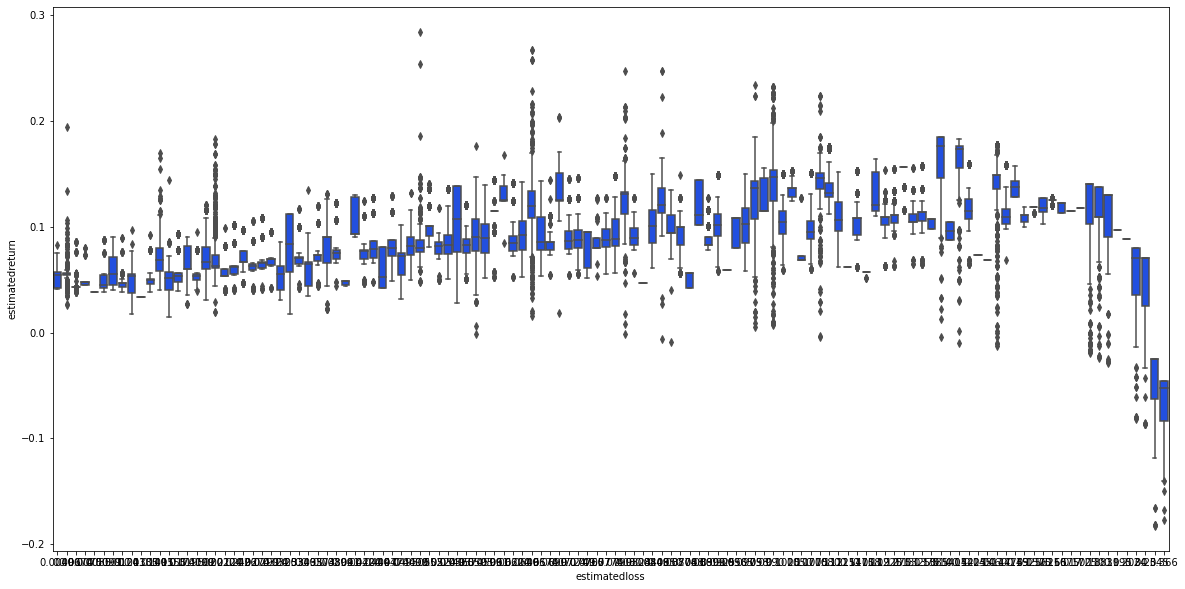

In [99]:
plt.figure(figsize= [20,10])
sb.boxplot(data = dfb , x = "estimatedloss", y = "estimatedreturn" , color=coloring )

#### Explore Prosper_rating vs lenderYield - 2 numerical - scatterplot

#TotalProsperloans vs OnTimeProsperLoans

#Categorical columns

#LoanStatus , EmploymentStatus , IsBorrowHouseOwner

In [100]:
dfb.columns

Index(['index', 'listingkey', 'listingnumber', 'listingcreationdate',
       'creditgrade', 'term', 'loanstatus', 'closeddate', 'borrowerapr',
       'borrowerrate', 'lenderyield', 'estimatedeffectiveyield',
       'estimatedloss', 'estimatedreturn', 'prosperrating_numeric',
       'prosperrating (alpha)', 'prosperscore', 'listingcategory (numeric)',
       'borrowerstate', 'occupation', 'employmentstatus',
       'employmentstatusduration', 'isborrowerhomeowner', 'currentlyingroup',
       'groupkey', 'datecreditpulled', 'creditscorerangelower',
       'creditscorerangeupper', 'firstrecordedcreditline',
       'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years',
       'openrevolvingaccounts', 'openrevolvingmonthlypayment',
       'inquirieslast6months', 'totalinquiries', 'currentdelinquencies',
       'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',


<AxesSubplot:xlabel='estimatedreturn', ylabel='occupation'>

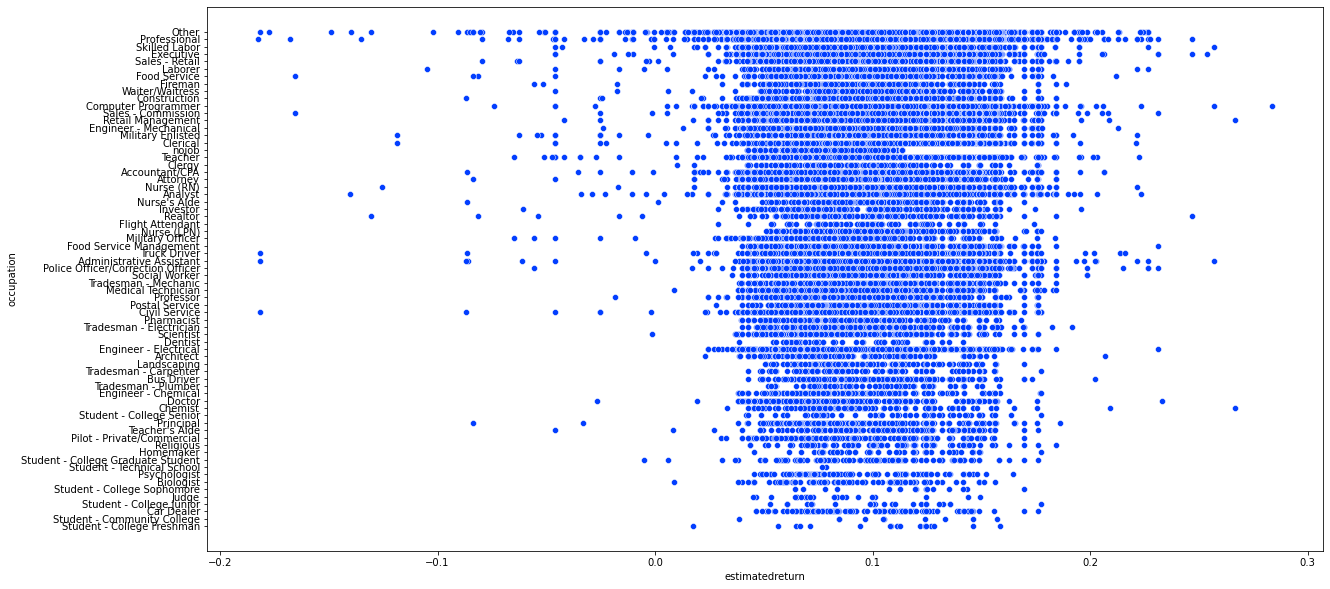

In [101]:
plt.figure(figsize= [20,10])
sb.scatterplot(data = dfb , x = "estimatedreturn", y = "occupation" , color=coloring )

### Question: what is the connection between prosper rating and Lender yield?

### Visualization

Text(0.5, 1.0, 'Prosper Rating Numeric based on Lender Yield')

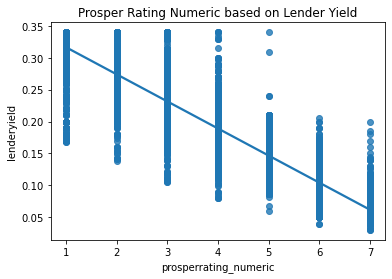

In [102]:
sb.regplot(data = dfb , x = "prosperrating_numeric" , y = "lenderyield");
plt.title("Prosper Rating Numeric based on Lender Yield")

#### Observation: When the borrower has a good prosper score , this has a negative effect on the lendersyield

### Question: what is the relationship between the estimated loss and estimated return?

### Visualization

<AxesSubplot:xlabel='estimatedloss', ylabel='estimatedreturn'>

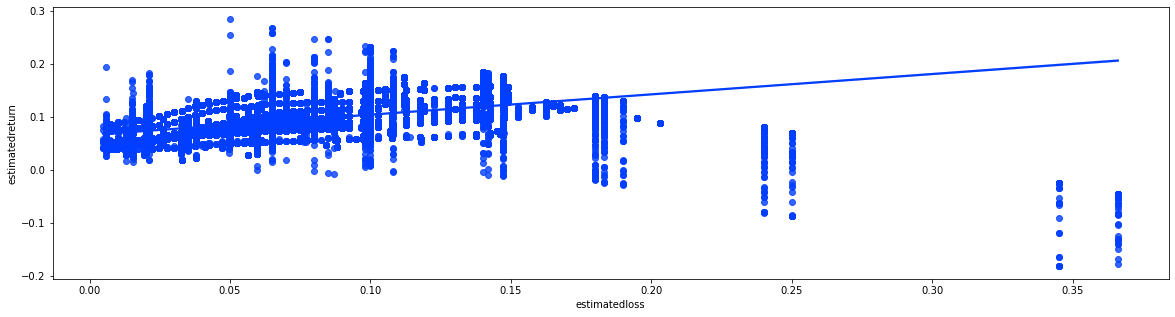

In [103]:
plt.figure(figsize= [20,5])
sb.regplot(data = dfb , x = "estimatedloss", y = "estimatedreturn" , color=coloring )

### Observation: The estimatedloss decreases with estimatedreturn

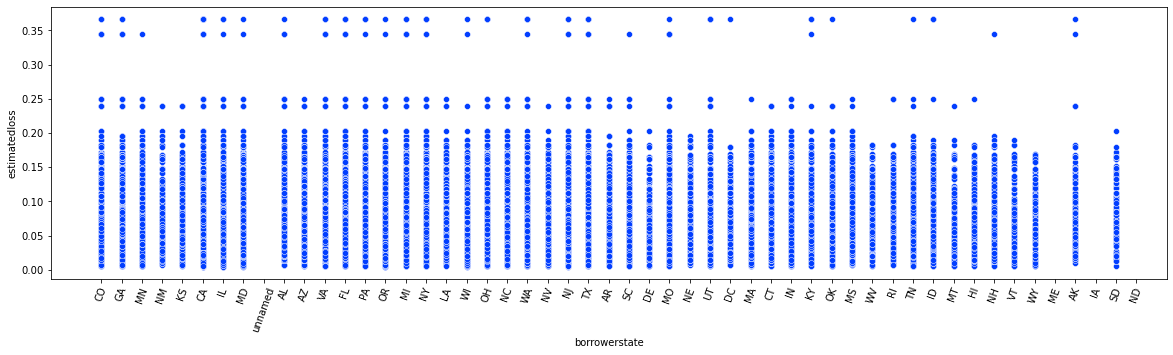

In [104]:
plt.figure(figsize= [20,5])
sb.scatterplot(data = dfb , x = "borrowerstate", y = "estimatedloss" , color=coloring)
plt.xticks(rotation = 70);

In [106]:
loan_rating = dfb.groupby("loanstatus")["prosperrating_numeric"].mean().sort_values(ascending = False)
rate_index = loan_rating.index

In [107]:
loan_rating

loanstatus
Current                   4.286309
FinalPaymentInProgress    3.965517
Completed                 3.907333
Past Due (1-15 days)      3.373750
Past Due (31-60 days)     3.329640
Past Due (91-120 days)    3.322368
Past Due (16-30 days)     3.275472
Past Due (61-90 days)     3.192926
Defaulted                 3.015920
Past Due (>120 days)      3.000000
Chargedoff                2.882871
Cancelled                      NaN
Name: prosperrating_numeric, dtype: float64

### Question: how is the prosperrating related to loan status?

### Visualization

Text(0.5, 1.0, 'Prosper Rating Numeric based on Loan Status')

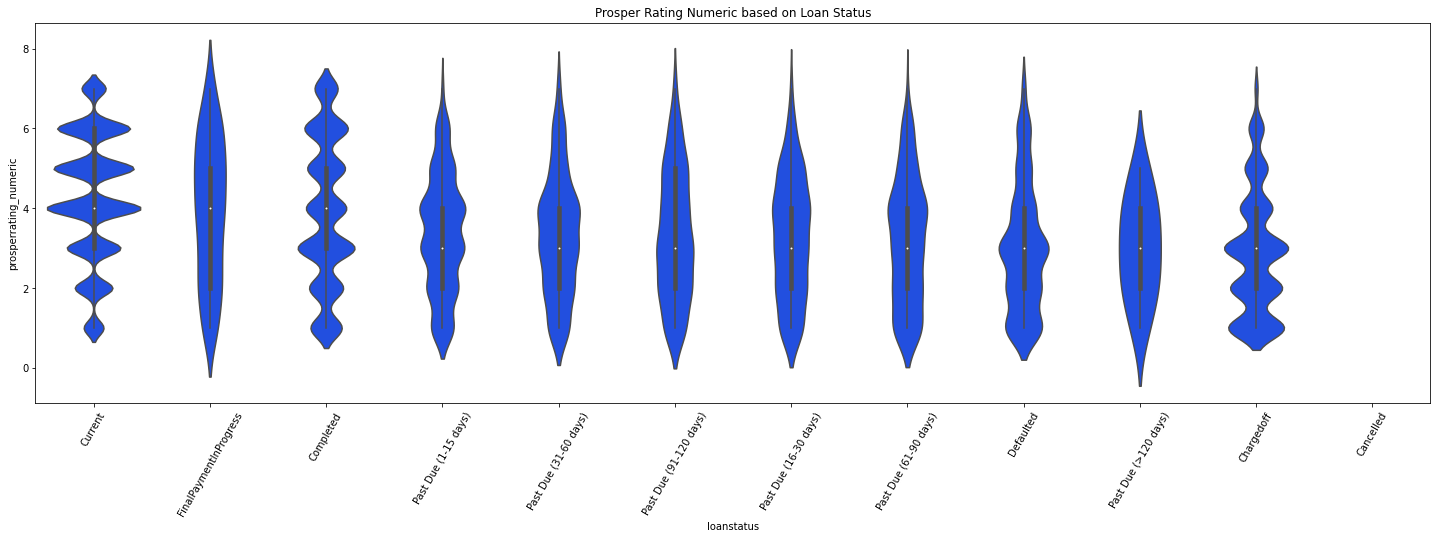

In [108]:
plt.figure(figsize= [25,7])
sb.violinplot(data = dfb , x = "loanstatus", y  ="prosperrating_numeric" , color=coloring, 
              order= rate_index)
plt.xticks(rotation = 60);
plt.title("Prosper Rating Numeric based on Loan Status")

#### Observation: Current loans seems to have better prosper score than other loan status

### Question: how does income range relate to prosper score?

### Visualization

Text(0.5, 1.0, 'Prosper Score based on Income Range')

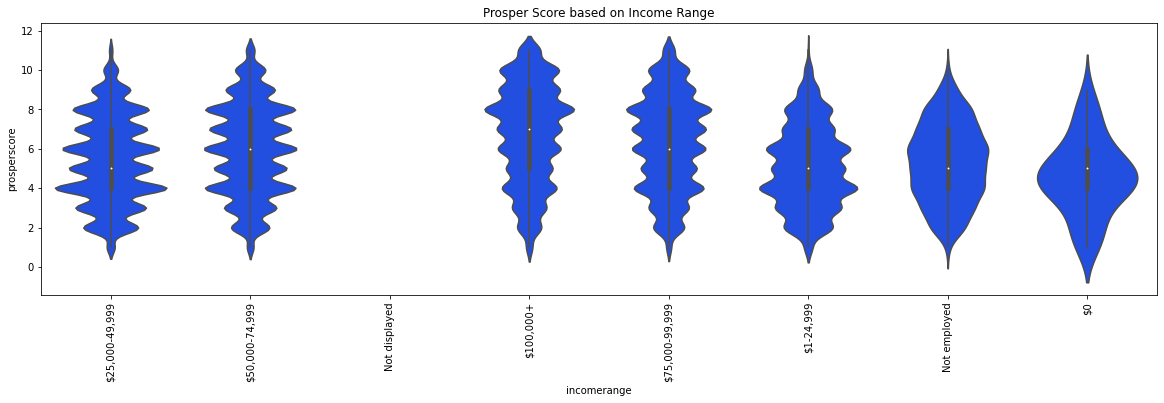

In [109]:
plt.figure(figsize= [20,5])
sb.violinplot(data = dfb , x = "incomerange", y  ="prosperscore" , color=coloring)
plt.xticks(rotation = 90);
plt.title("Prosper Score based on Income Range")

#### Observation: Borrowers in income range of $25,000 - $49,000 have better prosper score than others

In [110]:
current_loan = dfb[dfb["loanstatus"] == "Current"]

In [111]:
current_loan["prosperrating_numeric"].value_counts()

4.0    13764
5.0    11681
6.0    10595
3.0     7818
2.0     5483
7.0     3506
1.0     2883
Name: prosperrating_numeric, dtype: int64

In [112]:
current_loan.groupby("loanstatus")["prosperrating_numeric"].mean()

loanstatus
Current    4.286309
Name: prosperrating_numeric, dtype: float64

In [113]:
dfb["loanstatus"].value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: loanstatus, dtype: int64

In [114]:
credit_index = dfb.groupby("loanstatus")["prosperrating_numeric"].mean().sort_values(ascending = False).index
credit_index

Index(['Current', 'FinalPaymentInProgress', 'Completed',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'Past Due (16-30 days)',
       'Past Due (61-90 days)', 'Defaulted', 'Past Due (>120 days)',
       'Chargedoff', 'Cancelled'],
      dtype='object', name='loanstatus')

In [115]:
dfb.groupby("loanstatus")["prosperrating_numeric"].mean().sort_values(ascending = False)

loanstatus
Current                   4.286309
FinalPaymentInProgress    3.965517
Completed                 3.907333
Past Due (1-15 days)      3.373750
Past Due (31-60 days)     3.329640
Past Due (91-120 days)    3.322368
Past Due (16-30 days)     3.275472
Past Due (61-90 days)     3.192926
Defaulted                 3.015920
Past Due (>120 days)      3.000000
Chargedoff                2.882871
Cancelled                      NaN
Name: prosperrating_numeric, dtype: float64

In [117]:
dfb["isborrowerhomeowner"]

0         1
1         0
2         0
3         1
4         1
5         1
6         0
7         0
8         1
9         0
10        0
11        0
12        1
13        0
14        1
15        1
16        1
17        0
18        0
19        1
20        0
21        0
22        0
23        1
24        0
25        0
26        1
27        1
28        0
29        0
30        1
31        0
32        1
33        0
34        1
35        1
36        1
37        0
38        0
39        1
40        0
41        0
42        1
43        1
44        0
45        1
46        1
47        1
48        1
49        1
50        1
51        0
52        1
53        0
54        0
55        1
56        0
57        0
58        1
59        1
60        0
61        1
62        1
63        1
64        0
65        0
66        1
67        1
68        0
69        1
70        0
71        1
72        1
73        0
74        1
75        1
76        1
77        0
78        0
79        0
80        0
81        0
82        1
83  

### Question: How does Lender Yield relate to Prosper Rating

### Visualization

Text(0.5, 1.0, 'Plot of Lender Yield on Prosper Rating_numeric')

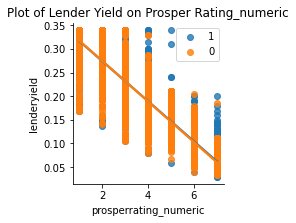

In [140]:
face_home = sb.FacetGrid(data = dfb , hue = "isborrowerhomeowner")
face_home.map(sb.regplot, "prosperrating_numeric", "lenderyield")
plt.legend();
plt.title("Plot of Lender Yield on Prosper Rating_numeric")

### Observation: The Lenderyield decreases with prosperrating

Text(0.5, 1.0, 'Heatmap of Loan Correlation')

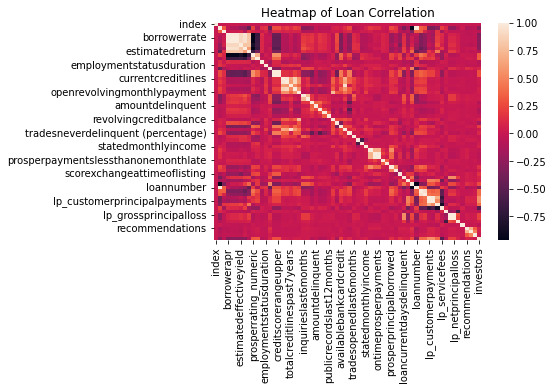

In [121]:
# To show the intensity of the loan correlation
sb.heatmap(dfb.corr());
plt.title("Heatmap of Loan Correlation")

<a id='multivar'></a>
## Multivariate Exploration

Text(0.5, 1.0, 'Plot of Lender Yield on Prosper Rating_numeric')

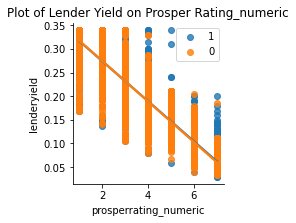

In [128]:
g = sb.FacetGrid(data = dfb , hue = "isborrowerhomeowner")
g.map(sb.regplot, "prosperrating_numeric", "lenderyield")
plt.legend();
plt.title("Plot of Lender Yield on Prosper Rating_numeric")

Text(0.5, 1.0, 'Plot of Estimatedloss on Estimatedreturn')

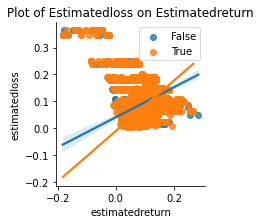

In [133]:
g = sb.FacetGrid(data = dfb , hue = "incomeverifiable")
g.map(sb.regplot, "estimatedreturn", "estimatedloss")
plt.legend();
plt.title("Plot of Estimatedloss on Estimatedreturn")

### To save the new data, dfb

In [142]:
# To store the new data drop_df for later use
dfb.to_csv("prosperloan.csv", index = False)

<a id='conclude'></a>
## Conclusion

The Dataset is Prosper Loan data. The dataset was wrangled and cleaned, a copy of the original made before exploration. For instance, null values in borrowerapr and other columns were filled out.

During exploration, I found a strong connection between the borrower annual percentage rate (apr) and the borrower rate.

Medium-term loans have the highest occurrence with a count of 87778 representing about 77 percent of loan term duration, leaving the other 23 percent distributed between the short-term and long-term loans.

Disbursed loans were distributed over ten(10) years from 2005 to 2014. 2013 has the highest number of loans disbursed with a total of 34345, then years 2012 and 2014 respectively at second and third position. The lowest nuber of loans disbursed occurred in the year 2005, with just 22 disbursements.

City of California has the largest number of borrowers.
There is a slight difference between the estimates of yields and return. 

There is no significance whether a borrower owns a home or does not.